In [52]:
import bs4 as bs # Beautiful Soup for scraping data from webpages
import urllib.request # For requsting content from webpages.
import pandas as pd # Pandas allow importing data of various file formats such as csv, excel etc and manipulation of these.
import numpy as np # NumPy is the most basic yet a powerful package for scientific computing and data.
import matplotlib.pyplot as plt # Matplotlib is a plotting library.
import seaborn as sns # Seaborn provides a high-level interface for drawing attractive and informative statistical graphics. 
import plotly.graph_objects as go # Plotly is used to style interactive graphs. Make sure the version is above 4.0.0 .
import plotly.express as px
from plotly.subplots import make_subplots
%matplotlib inline 
import io
import requests
import datetime
#  Makes your plot outputs appear and be stored within the notebook.

source = urllib.request.urlopen('https://www.mohfw.gov.in/').read()
soup = bs.BeautifulSoup(source,'lxml')

In [53]:
table = soup.table

In [54]:
table_rows = table.find_all('tr')

In [55]:
l = []
for tr in table_rows:
    th = tr.find_all('th')
    row = [i.text for i in th]
    if len(row) != 0:
        l.append(row)


In [56]:
for tr in table_rows:
    td = tr.find_all('td')
    row = [i.text for i in td]
    l.append(row)


In [57]:
df = pd.DataFrame(l)
df.dropna(inplace=True)
df.head()


,0,1,2,3,4,5
0,S. No.,Name of State / UT,Active Cases*,Cured/Discharged/Migrated*,Deaths**,Total Confirmed cases*
2,1,Andaman and Nicobar Islands,72,75,0,147
3,2,Andhra Pradesh,11200,9745,252,21197
4,3,Arunachal Pradesh,169,105,2,276
5,4,Assam,4179,8329,14,12522


In [58]:
df.rename(columns = df.iloc[0],inplace=True)
df.drop(0, axis=0,inplace=True)
df.head()

,S. No.,Name of State / UT,Active Cases*,Cured/Discharged/Migrated*,Deaths**,Total Confirmed cases*
2,1,Andaman and Nicobar Islands,72,75,0,147
3,2,Andhra Pradesh,11200,9745,252,21197
4,3,Arunachal Pradesh,169,105,2,276
5,4,Assam,4179,8329,14,12522
6,5,Bihar,3182,9284,104,12570


In [59]:
df_state = df.copy()

In [60]:
# df_state = df_state.rename(columns={df_state.columns[0]:'Sr.No',
#                                     df_state.columns[1]:'States/UT',
#                                     df_state.columns[2]:'Confirmed',
#                                     df_state.columns[3]:'Recovered',
#                                     df_state.columns[4]:'Deceased'})

new_cols = ["Sr.No", "States/UT","Confirmed","Recovered","Deceased",'Total']
for i in zip(df_state.columns, new_cols):
    df_state = df_state.rename(columns={i[0]:i[1]})
df_state.head()

,Sr.No,States/UT,Confirmed,Recovered,Deceased,Total
2,1,Andaman and Nicobar Islands,72,75,0,147
3,2,Andhra Pradesh,11200,9745,252,21197
4,3,Arunachal Pradesh,169,105,2,276
5,4,Assam,4179,8329,14,12522
6,5,Bihar,3182,9284,104,12570


In [61]:
df_state["Sr.No"] = df_state["Sr.No"].apply(lambda x : x if len(x) != 0 else None)
df_state.dropna(subset=["Sr.No"],inplace=True)
df_state.head()

,Sr.No,States/UT,Confirmed,Recovered,Deceased,Total
2,1,Andaman and Nicobar Islands,72,75,0,147
3,2,Andhra Pradesh,11200,9745,252,21197
4,3,Arunachal Pradesh,169,105,2,276
5,4,Assam,4179,8329,14,12522
6,5,Bihar,3182,9284,104,12570


In [62]:
df_state.Confirmed = df_state.Confirmed.astype(int) 
df_state.Recovered = df_state.Recovered.astype(int)
df_state.Deceased = df_state.Deceased.astype(int)
df_state.Total = df_state.Total.astype(int)


In [63]:
df_state = df_state.sort_values(by='Confirmed',ascending=False)
df_state.head()
df_state.to_csv('India.csv')

In [64]:
df_state.Confirmed.sum()

259926

In [65]:
df_state.Total.sum()

737399

In [66]:
fig = px.histogram(df_state, x="Confirmed",nbins=20)
fig.show()

In [67]:
fig = go.Figure() 
fig.add_trace(go.Scatter( # Using Plotly's Scatter Method to plot a graph of States against No. of Cases.
    x= df_state.Confirmed,
    y= df_state['States/UT'],
    mode = 'markers'
))
fig.update_layout(  # Making updates in layout 
    title="State vs Total Cases",
    xaxis_title="Total Cases",
    yaxis_title="States",
    font=dict(
        family="Courier New, monospace",
        size=18,
        color="#7f7f7f"
    )
)

In [68]:
fig = go.Figure() 
fig.add_trace(go.Scatter( # Using Plotly's Scatter Method to plot a graph of States against Recovered cases.
    x= df_state.Recovered,
    y= df_state['States/UT'],
    mode='markers'
))
fig.update_layout(  # Making updates in layout 
    title="State vs Cured Cases",
    xaxis_title="Cured Cases",
    yaxis_title="States",
    font=dict(
        family="Courier New, monospace",
        size=18,
        color="#7f7f7f"
    )
)

In [69]:
import geopandas as gpd 
map_data = gpd.read_file('India shape/Indian_States.shp')
map_data.rename(columns = {'st_nm':'States/UT'}, inplace = True)
map_data.head()

,States/UT,geometry
0,Andaman & Nicobar Island,"MULTIPOLYGON (((93.71976 7.20707, 93.71909 7.2..."
1,Arunanchal Pradesh,"POLYGON ((96.16261 29.38078, 96.16860 29.37432..."
2,Assam,"MULTIPOLYGON (((89.74323 26.30362, 89.74290 26..."
3,Bihar,"MULTIPOLYGON (((84.50720 24.26323, 84.50355 24..."
4,Chandigarh,"POLYGON ((76.84147 30.75996, 76.83599 30.73623..."


In [70]:
# correct the name of states in the map dataframe 
map_data['States/UT'] = map_data['States/UT'].str.replace('&', 'and')
map_data['States/UT'].replace('Arunanchal Pradesh', 'Arunachal Pradesh', inplace = True)
map_data['States/UT'].replace('Telangana', 'Telengana', inplace = True)
map_data['States/UT'].replace('NCT of Delhi', 'Delhi', inplace = True)

In [71]:
# merge both the dataframes - state_data and map_data
merged_data = pd.merge(map_data, df_state, how = 'left', on = 'States/UT')
merged_data.fillna(0, inplace = True)

# merged_data.drop('Sr.No', axis = 1, inplace = True)
merged_data.head()


,States/UT,geometry,Sr.No,Confirmed,Recovered,Deceased,Total
0,Andaman and Nicobar Island,"MULTIPOLYGON (((93.71976 7.20707, 93.71909 7.2...",0,0.0,0.0,0.0,0.0
1,Arunachal Pradesh,"POLYGON ((96.16261 29.38078, 96.16860 29.37432...",3,169.0,105.0,2.0,276.0
2,Assam,"MULTIPOLYGON (((89.74323 26.30362, 89.74290 26...",4,4179.0,8329.0,14.0,12522.0
3,Bihar,"MULTIPOLYGON (((84.50720 24.26323, 84.50355 24...",5,3182.0,9284.0,104.0,12570.0
4,Chandigarh,"POLYGON ((76.84147 30.75996, 76.83599 30.73623...",6,86.0,401.0,7.0,494.0


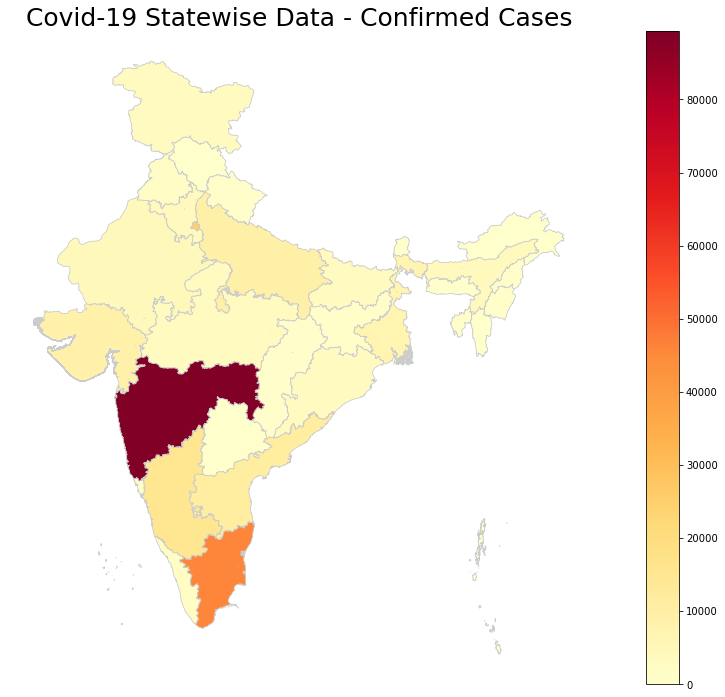

In [72]:
# create figure and axes for Matplotlib and set the title
fig, ax = plt.subplots(1, figsize=(20, 12))
ax.axis('off')
ax.set_title('Covid-19 Statewise Data - Confirmed Cases', fontdict = {'fontsize': '25', 'fontweight' : '3'})
# plot the figure
merged_data.plot(column = 'Confirmed', cmap='YlOrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend = True)
plt.show()

In [73]:
source = urllib.request.urlopen('https://coronavirus.jhu.edu/map.html').read()
soup = bs.BeautifulSoup(source,'lxml')


In [74]:
url = 'https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv'

In [75]:
read_data = requests.get(url).content

In [76]:
df = pd.read_csv(io.StringIO(read_data.decode('utf-8')))
df.head()

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,...,aged_70_older,gdp_per_capita,extreme_poverty,cvd_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy
0,AFG,Asia,Afghanistan,2019-12-31,0.0,0.0,0.0,0.0,0.0,0.0,...,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
1,AFG,Asia,Afghanistan,2020-01-01,0.0,0.0,0.0,0.0,0.0,0.0,...,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
2,AFG,Asia,Afghanistan,2020-01-02,0.0,0.0,0.0,0.0,0.0,0.0,...,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
3,AFG,Asia,Afghanistan,2020-01-03,0.0,0.0,0.0,0.0,0.0,0.0,...,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
4,AFG,Asia,Afghanistan,2020-01-04,0.0,0.0,0.0,0.0,0.0,0.0,...,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83


In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28714 entries, 0 to 28713
Data columns (total 34 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   iso_code                         28650 non-null  object 
 1   continent                        28460 non-null  object 
 2   location                         28714 non-null  object 
 3   date                             28714 non-null  object 
 4   total_cases                      28440 non-null  float64
 5   new_cases                        28440 non-null  float64
 6   total_deaths                     28440 non-null  float64
 7   new_deaths                       28440 non-null  float64
 8   total_cases_per_million          28376 non-null  float64
 9   new_cases_per_million            28376 non-null  float64
 10  total_deaths_per_million         28376 non-null  float64
 11  new_deaths_per_million           28376 non-null  float64
 12  total_tests       

In [78]:
df_clean = df[['iso_code','location','date','total_cases','new_cases','total_cases_per_million',
       'new_cases_per_million', 'total_deaths_per_million',
       'new_deaths_per_million']]

In [79]:
# Converting date from string to datetime and Truncating it to just date rather than date and time. 

df_clean['date'] = df_clean['date'].apply(lambda x : datetime.datetime.strptime(x, '%Y-%m-%d').date()) 



c:\users\sanjeev\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [80]:
from datetime import date
today = date.today()
df_clean = df_clean[df_clean['date'] == today - datetime.timedelta(1)]
df_clean.head()

,iso_code,location,date,total_cases,new_cases,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million
179,AFG,Afghanistan,2020-07-07,33384.0,433.0,857.576,11.123,23.633,1.439
300,ALB,Albania,2020-07-07,2964.0,71.0,1029.953,24.672,27.452,1.042
485,DZA,Algeria,2020-07-07,16404.0,463.0,374.085,10.558,21.869,0.160
601,AND,Andorra,2020-07-07,855.0,0.0,11065.812,0.000,673.008,0.000
709,AGO,Angola,2020-07-07,353.0,7.0,10.740,0.213,0.578,0.000


In [81]:
df_clean.sort_values(by='location').head()
df_clean.to_csv('All_countries.csv')

In [82]:
fig = go.Figure() 
fig.add_trace(go.Scatter( # Using Plotly's Scatter Method to plot a graph of popularity against vote_average.
    x= df_clean.total_cases,
    y= df_clean.location,
    mode='markers'
))
fig.update_layout(  # Making updates in layout 
    title="Country vs Total Cases",
    xaxis_title="Total Cases",
    yaxis_title="Country",
    font=dict(
        family="Courier New, monospace",
        size=18,
        color="#7f7f7f"
    )
)

In [83]:

fig = px.scatter_geo(df_clean, locations="iso_code", color='total_cases_per_million',
                      hover_name="location", size = "total_cases",
                      projection="eckert4")
fig.show()
fig.write_html("file.html")

In [84]:
map_data = gpd.read_file('World shape/World_Countries.shp')
map_data.rename(columns = {'COUNTRY':'location'}, inplace = True)
map_data.head()

,location,geometry
0,Aruba (Netherlands),"POLYGON ((-69.88223 12.41111, -69.94695 12.436..."
1,Antigua and Barbuda,"MULTIPOLYGON (((-61.73889 17.54055, -61.75195 ..."
2,Afghanistan,"POLYGON ((61.27656 35.60725, 61.29638 35.62853..."
3,Algeria,"POLYGON ((-5.15213 30.18047, -5.13917 30.19236..."
4,Azerbaijan,"MULTIPOLYGON (((46.54037 38.87559, 46.49554 38..."


In [85]:
merged_data = pd.merge(map_data, df_clean, how = 'left', on = 'location')
merged_data.fillna(0, inplace = True)

# merged_data.drop('Sr.No', axis = 1, inplace = True)
merged_data = merged_data[merged_data.total_cases != 0]
merged_data.head()

len(merged_data)


177

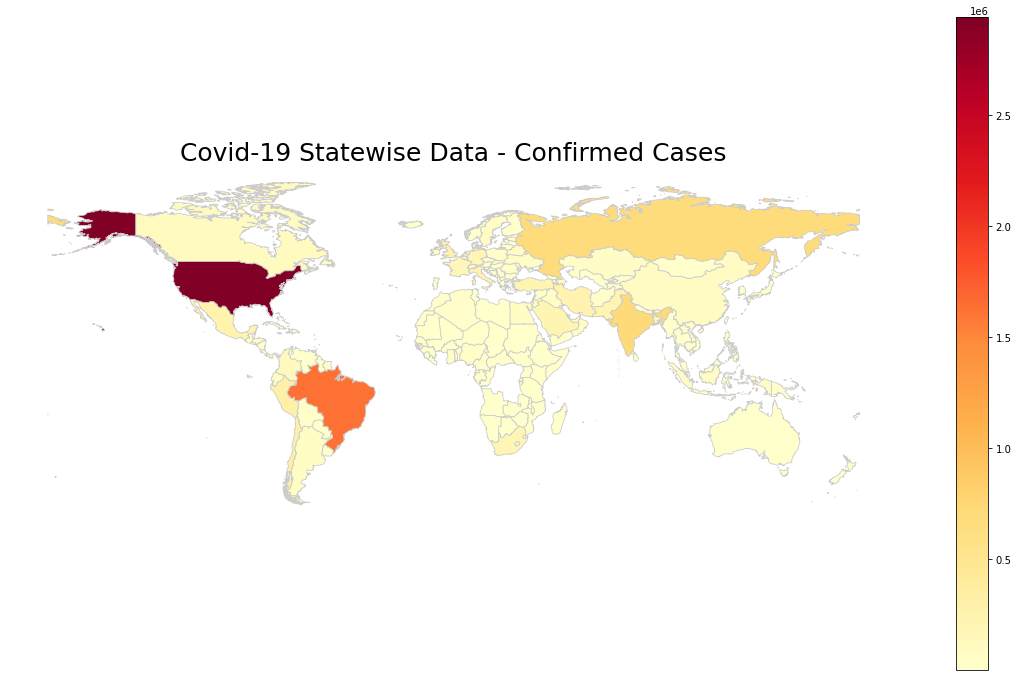

In [86]:
# create figure and axes for Matplotlib and set the title
fig, ax = plt.subplots(1, figsize=(20, 12))
ax.axis('off')
ax.set_title('Covid-19 Statewise Data - Confirmed Cases', fontdict = {'fontsize': '25', 'fontweight' : '3'})
# plot the figure
merged_data.plot(column = 'total_cases', cmap='YlOrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend = True)
plt.show()

In [87]:
import requests
from bs4 import BeautifulSoup

url = "https://www.worldometers.info/coronavirus/#countries"
page = requests.get(url)
soup = BeautifulSoup(page.content, 'html.parser')


In [88]:
table = soup.table

In [89]:
table_rows = table.find_all('tr')

In [90]:
l = []
for tr in table_rows:
    th = tr.find_all('th')
    row = [i.text for i in th]
    if len(row) != 0:
        l.append(row)


In [91]:
for tr in table_rows:
    td = tr.find_all('td')
    row = [i.text for i in td]
    l.append(row)


In [92]:
df = pd.DataFrame(l)
df.dropna(inplace=True)
df.head()


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,#,"Country,Other",TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/\n1M pop\n,Population,Continent,1 Caseevery X ppl,1 Deathevery X ppl,1 Testevery X ppl
2,,\nNorth America\n,"3,628,078","+7,090","178,649",+920,"1,647,848","+4,305","1,801,581","18,592",,,,,,North America,\n,,
3,,\nSouth America\n,"2,614,931","+1,036","96,832",+54,"1,717,350","+46,162","800,749","13,639",,,,,,South America,\n,,
4,,\nAsia\n,"2,684,829","+4,568","64,533",+91,"1,828,356","+6,884","791,940","19,501",,,,,,Asia,\n,,
5,,\nEurope\n,"2,504,677",,"194,548",,"1,451,335",,"858,794","5,461",,,,,,Europe,\n,,


In [93]:
df.rename(columns = df.iloc[0],inplace=True)
df.drop(0, axis=0,inplace=True)
df.head()

,#,"Country,Other",TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/\n1M pop\n,Population,Continent,1 Caseevery X ppl,1 Deathevery X ppl,1 Testevery X ppl
2,,\nNorth America\n,"3,628,078","+7,090","178,649",+920,"1,647,848","+4,305","1,801,581","18,592",,,,,,North America,\n,,
3,,\nSouth America\n,"2,614,931","+1,036","96,832",+54,"1,717,350","+46,162","800,749","13,639",,,,,,South America,\n,,
4,,\nAsia\n,"2,684,829","+4,568","64,533",+91,"1,828,356","+6,884","791,940","19,501",,,,,,Asia,\n,,
5,,\nEurope\n,"2,504,677",,"194,548",,"1,451,335",,"858,794","5,461",,,,,,Europe,\n,,
6,,\nAfrica\n,"511,170",,"12,015",,"247,734",,"251,421",950,,,,,,Africa,\n,,


In [94]:
df.columns

Index(['#', 'Country,Other', 'TotalCases', 'NewCases', 'TotalDeaths',
       'NewDeaths', 'TotalRecovered', 'NewRecovered', 'ActiveCases',
       'Serious,Critical', 'Tot Cases/1M pop', 'Deaths/1M pop', 'TotalTests',
       'Tests/\n1M pop\n', 'Population', 'Continent', '1 Caseevery X ppl',
       '1 Deathevery X ppl', '1 Testevery X ppl'],
      dtype='object')

In [95]:
df.rename(columns={'Country,Other':'Country','#':'No.'},inplace=True)

In [96]:
df.tail(15)

,No.,Country,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/\n1M pop\n,Population,Continent,1 Caseevery X ppl,1 Deathevery X ppl,1 Testevery X ppl
218,209,MS Zaandam,9,,2,,,,7,,,,,,,,,,
219,210,British Virgin Islands,8,,1,,7,,0,,265,33,439,"14,520","30,235",North America,"3,779","30,235",69
220,211,Caribbean Netherlands,7,,,,7,,0,,267,,424,"16,167","26,227",North America,"3,747",,62
221,212,St. Barth,6,,,,6,,0,,607,,507,"51,326","9,878",North America,"1,646",,19
222,213,Anguilla,3,,,,3,,0,,200,,305,"20,327","15,005",North America,"5,002",,49
223,214,Saint Pierre Miquelon,1,,,,1,,0,,173,,,,"5,793",North America,"5,793",,
224,215,China,"83,572",+7,"4,634",,"78,548",+20,390,5,58,3,"90,410,000","62,814","1,439,323,776",Asia,"17,223","310,601",16
225,,Total:,"3,628,078","+7,090","178,649",+920,"1,647,848","+4,305","1,801,581","18,592",,,,,,North America,,,
226,,Total:,"2,614,931","+1,036","96,832",+54,"1,717,350","+46,162","800,749","13,639",,,,,,South America,,,
227,,Total:,"2,684,829","+4,568","64,533",+91,"1,828,356","+6,884","791,940","19,501",,,,,,Asia,,,


In [97]:
df.head(15)

,No.,Country,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/\n1M pop\n,Population,Continent,1 Caseevery X ppl,1 Deathevery X ppl,1 Testevery X ppl
2,,\nNorth America\n,"3,628,078","+7,090","178,649",+920,"1,647,848","+4,305","1,801,581","18,592",,,,,,North America,\n,,
3,,\nSouth America\n,"2,614,931","+1,036","96,832",+54,"1,717,350","+46,162","800,749","13,639",,,,,,South America,\n,,
4,,\nAsia\n,"2,684,829","+4,568","64,533",+91,"1,828,356","+6,884","791,940","19,501",,,,,,Asia,\n,,
5,,\nEurope\n,"2,504,677",,"194,548",,"1,451,335",,"858,794","5,461",,,,,,Europe,\n,,
6,,\nAfrica\n,"511,170",,"12,015",,"247,734",,"251,421",950,,,,,,Africa,\n,,
7,,\nOceania\n,"10,538",+132,128,,"9,086",+32,"1,324",8,,,,,,Australia/Oceania,\n,,
8,,\n\n,721,,15,,651,,55,4,,,,,,,\n,,
9,,World,"11,954,944","+12,826","546,720","+1,065","6,902,360","+57,383","4,505,864","58,155","1,534",70.1,,,,All,\n,,
10,1,USA,"3,097,084",,"133,972",,"1,354,863",,"1,608,249","15,371","9,356",405,"38,801,591","117,211","331,039,330",North America,107,"2,471",9
11,2,Brazil,"1,674,655",,"66,868",,"1,117,922","+45,693","489,865","8,318","7,878",315,"4,359,978","20,509","212,587,032",South America,127,"3,179",49


In [98]:
df = df[8:224]

In [99]:
df

,No.,Country,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/\n1M pop\n,Population,Continent,1 Caseevery X ppl,1 Deathevery X ppl,1 Testevery X ppl
10,1,USA,"3,097,084",,"133,972",,"1,354,863",,"1,608,249","15,371","9,356",405,"38,801,591","117,211","331,039,330",North America,107,"2,471",9
11,2,Brazil,"1,674,655",,"66,868",,"1,117,922","+45,693","489,865","8,318","7,878",315,"4,359,978","20,509","212,587,032",South America,127,"3,179",49
12,3,India,"743,481",,"20,653",,"457,058",,"265,770","8,944",539,15,"10,473,771","7,588","1,380,233,788",Asia,"1,856","66,830",132
13,4,Russia,"694,230",,"10,494",,"463,880",,"219,856","2,300","4,757",72,"21,537,771","147,584","145,935,812",Europe,210,"13,907",7
14,5,Peru,"309,278",,"10,952",,"200,938",,"97,388","1,265","9,378",332,"1,821,328","55,227","32,978,661",South America,107,"3,011",18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
221,212,St. Barth,6,,,,6,,0,,607,,507,"51,326","9,878",North America,"1,646",,19
222,213,Anguilla,3,,,,3,,0,,200,,305,"20,327","15,005",North America,"5,002",,49
223,214,Saint Pierre Miquelon,1,,,,1,,0,,173,,,,"5,793",North America,"5,793",,
224,215,China,"83,572",+7,"4,634",,"78,548",+20,390,5,58,3,"90,410,000","62,814","1,439,323,776",Asia,"17,223","310,601",16


In [100]:
df.to_csv('All_countries_new.csv')